# <font color='red'>Black Friday Sales EDA</font>

## <font color='green'>About Dataset</font>
### <font color='blue'>Dataset History</font>

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.

The data set also contains customer demographics (age, gender, marital status, citytype, stayincurrentcity), product details (productid and product category) and Total purchaseamount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

### <font color='blue'>Date Preprocessing</font>

* Check basic statistics of dataset
* Check for missing values in the data
* check for unique values in data
* Perform EDA
* Purchase Distribution
* check for outliers
* Analysis by Gender, Marital Status, occupation, occupation vs purchase , purchase by city, purchase by age group, etc
* Drop unnecessary fields
* Convert categorical data into integer using map function (e.g 'Gender' column)
* missing value treatment
* Rename columns
* fill nan values
* map range variables into integers (e.g 'Age' column)

### <font color='blue'>Data Visualisation</font>

* visualize individul column
* Age vs Purchased
* Occupation vs Purchased
* Product_category_1 vs Purchased
* Product_category_2 vs Purchased
* Product_category_3 vs Purchased
* City category pie chart
* check for more possible plots

### <font color='blue'>Conclusions </font>

> Target audience:
* Males of age between 18-45 are purchasing more number of products.

* Though the more number of purchases are made by males, the average money spent on each procuct by both males and females is same.

* The number of purchases and the total money spent is more for the age groups between 18-45 with 26-35 being the most. Also the number of unique products available are more in the same age groups. The average money spent per product is more or less same for all the age groups.

* More than 50% people are unmarried and 60% of the revenue comes from unmarried people.

* People from City category B.

* People with occupations [4,0,7] are purchasing more items and [17,12,15] are purchasing expensive items.

* People who stayed for 1 year are purchasing more items. And everyone are purchasing more or less same price items.

* Products of category [5,1,8] are being purchased more. Products of category [10,7,6] are most expensive ones.

* Product with ids [P00265242, P00110742, P00025442] are being purchased more and those with ids [P00086242,P00085342,P00200642] are the expensive ones compared to others.

### <font color='blue'>Inference </font>

* Age
> Most Visited are adults and least visited are children
* Gender
>Male has more count than Female<br>
Also Male has more purchase power than female
* City Category
>People visiting the store maximum are from City Category B<br>
Least People visiting the store are from City Category A<br>
In least and most visited store in different cities Men has purchased more than Women
* City
>Maximum people visiting the store are from City 1<br>
Least visited is City 0
* Marital Status

>Unmarried people are visiting the store more than married people<br>
In Marriage also Men are purchasing more than women
* Products

>In both Product1 and Product2 the 10th product is more purchased<br>
In Product3 3rd product is more purchased than others

https://www.kaggle.com/datasets/pranavuikey/black-friday-sales-eda

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
from math import sqrt, pow
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# warnings
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

%matplotlib inline
plt.style.use('seaborn-dark')

C:\Users\NguyenMinhThuy\AppData\Local\Temp\ipykernel_11932\2661827357.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


In [2]:
df = pd.read_csv("data/black-friday-sales-eda.csv", low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [3]:
df.shape

(550068, 12)

In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

## <font color='red'>Data Cleaning</font>

* Product_Category_2: Replace NAN value with most occurred category in the actual column.
* Product_Category_3: Replace NAN value with most occurred category in the actual column.

In [6]:
mode_product_cat2 = df['Product_Category_2'].mode()[0]
mode_product_cat3 = df['Product_Category_3'].mode()[0]

In [7]:
df['Product_Category_2'].fillna(mode_product_cat2, inplace=True)
df['Product_Category_3'].fillna(mode_product_cat3, inplace=True)

## <font color='red'>Format Data</font>

* Gender: F-Female, M-Male
* Marital_Status: 0: Single, 1: Married
* Combine 2 columns: Gender and Marital_Status

In [8]:
df['Gender'] = df['Gender'].replace(['F', 'M'], ['Female', 'Male'])

In [9]:
df['Marital_Status'] = df['Marital_Status'].replace([0,1], ['Single', 'Married'])

In [10]:
df['G_MS'] = df["Gender"].str.cat(df["Marital_Status"], sep = ", ")

## 📊 <font color='red'>Data Visualizations</font> 🖼

* visualize individul column
* Age vs Purchased
* Occupation vs Purchased
* Productcategory1 vs Purchased
* Productcategory2 vs Purchased
* Productcategory3 vs Purchased
* City category pie chart
* check for more possible plots

In [11]:
df.nunique().to_frame(name='Count of unique values')

,Count of unique values
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category_1,20
Product_Category_2,17


## <font color='red'>Visualize individual column</font>
### Column `Product_ID`

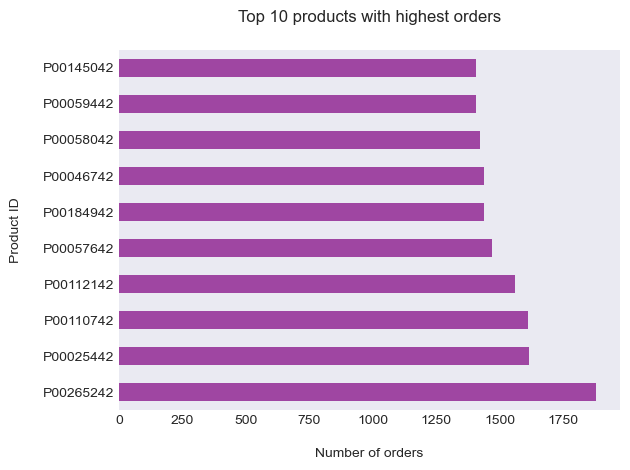

In [72]:
product_col = df['Product_ID'].value_counts().nlargest(10)

ax = product_col.plot(kind='barh', 
                      stacked=False,
                      color='purple', alpha=0.7)
plt.xlabel('Number of orders', labelpad=15)
plt.ylabel('Product ID', labelpad=15)
plt.title('Top 10 products with highest orders', pad=20)
plt.tight_layout()
plt.show;

### Column `Gender`

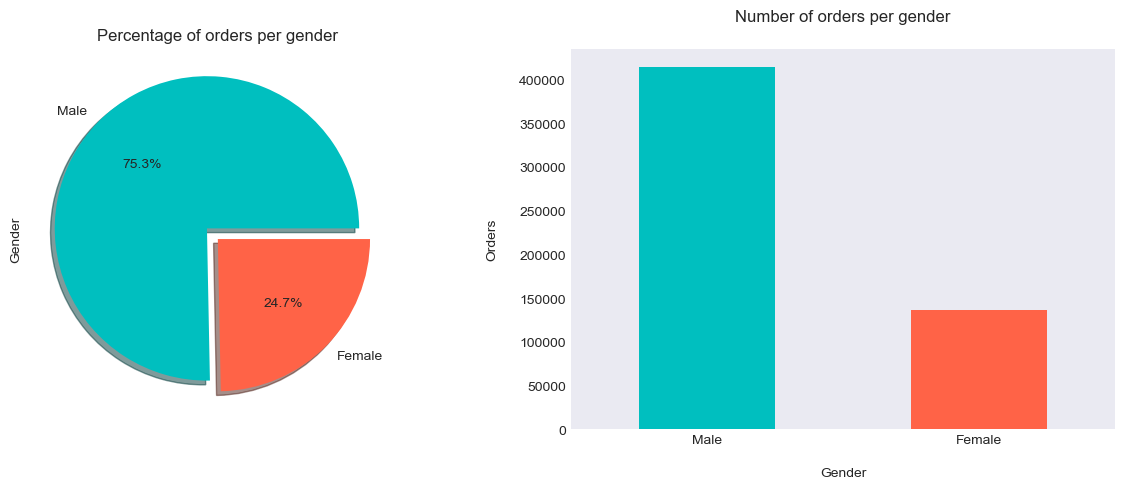

In [13]:
gender_col = df['Gender'].value_counts()

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

gender_col.plot(ax = ax1,
                kind='pie', labels = gender_col.index,
                autopct = '%1.1f%%', colors = ['c', 'tomato'],
                explode = (0.1, 0), shadow = True);

gender_col.plot(ax = ax2,
                kind='bar', stacked=False, 
                color=['c', 'tomato'], rot=0);

ax1.set_title('Percentage of orders per gender');

ax2.set_xlabel('Gender', labelpad=15);
ax2.set_ylabel('Orders', labelpad=15);
ax2.set_title('Number of orders per gender', pad=20);

plt.tight_layout()

### Column `Age`

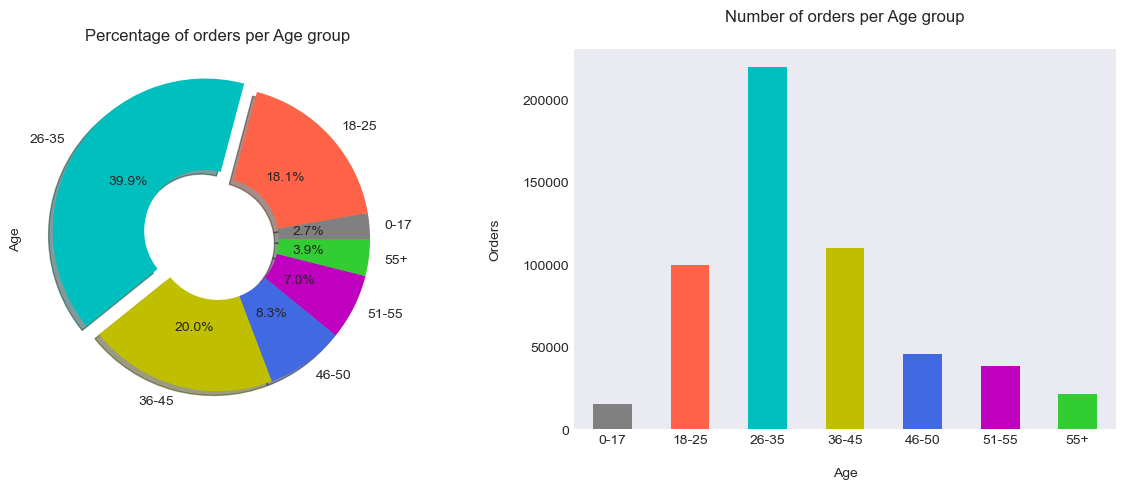

In [73]:
age_type = CategoricalDtype(categories=["0-17", "18-25", "26-35", "36-45", "46-50", "51-55","55+"], ordered=True)
age_col = df['Age'].astype(age_type).value_counts(sort=False)

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

age_col.plot(ax = ax1,
             kind ='pie',
             labels = age_col.index, autopct = '%1.1f%%',
             colors = ['gray','tomato','c','y','royalblue','m','limegreen'],             
             explode = (0, 0, 0.1, 0, 0, 0, 0), shadow = True,
             wedgeprops={"width":0.6});

age_col.plot(ax = ax2,
             kind='bar',
             stacked=False, rot=0,
             color = ['gray','tomato','c','y','royalblue','m','limegreen']);

ax1.set_title('Percentage of orders per Age group');

ax2.set_xlabel('Age', labelpad=15);
ax2.set_ylabel('Orders', labelpad=15);
ax2.set_title('Number of orders per Age group', pad=20);

plt.tight_layout()

### Column `Occupation`

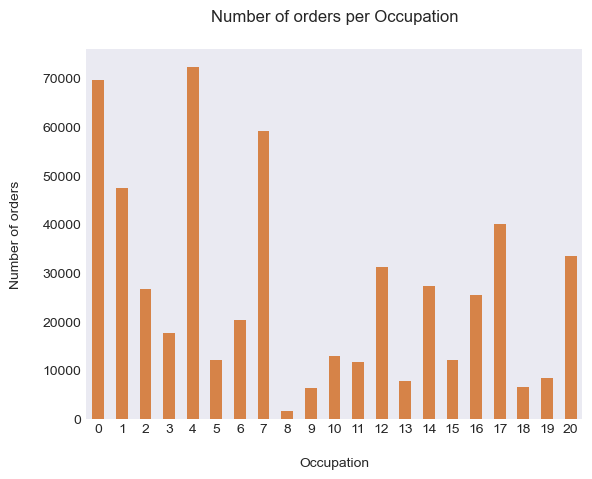

In [15]:
occ_type = CategoricalDtype(categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], ordered=True)
occ_col = df['Occupation'].astype(occ_type).value_counts(sort=False)

ax = occ_col.plot(kind='bar', 
                  stacked=False, rot=0,
                  color='chocolate', alpha=0.8)
plt.xlabel('Occupation', labelpad=15)
plt.ylabel('Number of orders', labelpad=15)
plt.title('Number of orders per Occupation', pad=20)
plt.show;

### Column `City_Category`

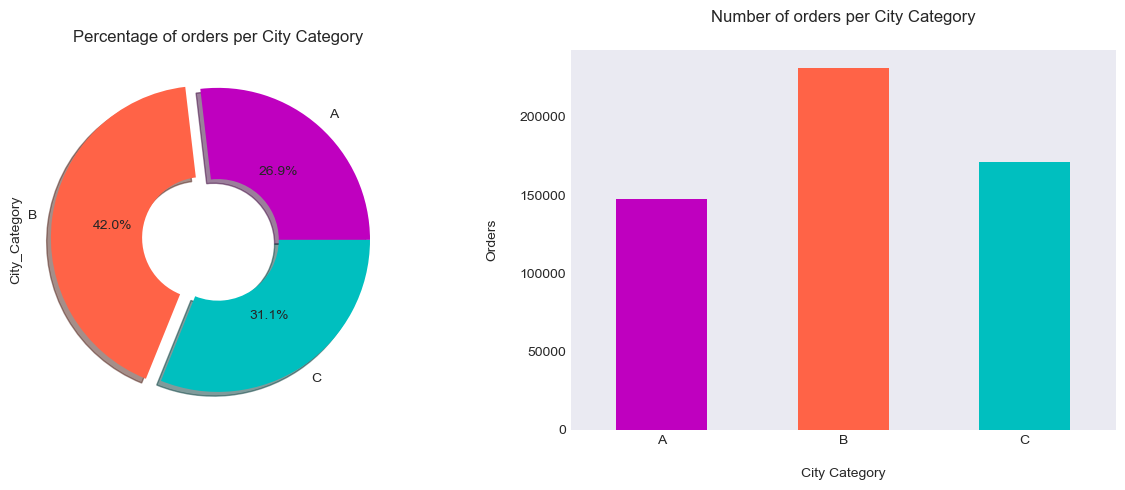

In [74]:
city_type = CategoricalDtype(categories=["A", "B", "C"], ordered=True)
city_cat_col = df['City_Category'].astype(city_type).value_counts(sort=False)

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

city_cat_col.plot(ax = ax1,
                 kind='pie',
                 labels = city_cat_col.index,
                 autopct = '%1.1f%%', colors = ['m','tomato','c'],
                 explode = (0, 0.1, 0), shadow = True,
                 wedgeprops={"width":0.6});

city_cat_col.plot(ax = ax2,
                 kind='bar',
                 stacked=False, rot=0,
                 color=['m','tomato','c']);

ax1.set_title('Percentage of orders per City Category');

ax2.set_xlabel('City Category', labelpad=15);
ax2.set_ylabel('Orders', labelpad=15);
ax2.set_title('Number of orders per City Category', pad=20);

plt.tight_layout()

[Text(0.5, 1.0, 'Check for Outliers')]

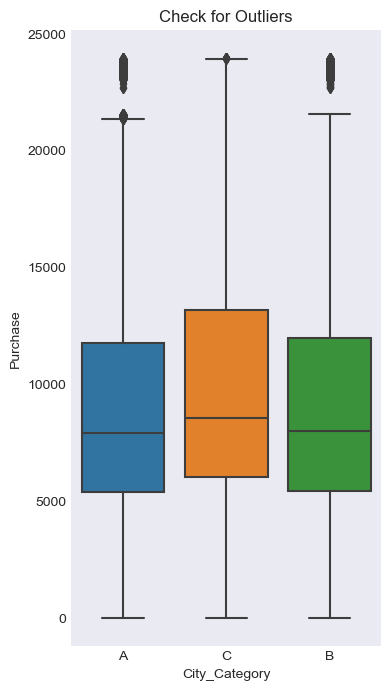

In [87]:
#Check for Outliers
k = plt.subplots(figsize=(4,8))
sns.boxplot(data=df, x = 'City_Category', y = 'Purchase').set(title = 'Check for Outliers')

### Column `Stay_In_Current_City_Years`

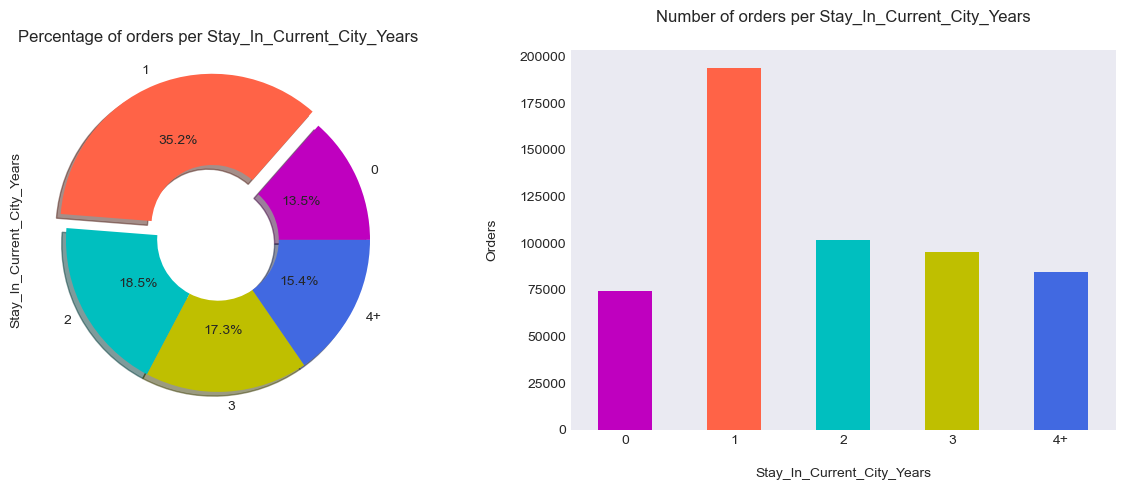

In [75]:
city_years_type = CategoricalDtype(categories=["0", "1", "2","3","4+"], ordered=True)
city_years_col = df['Stay_In_Current_City_Years'].astype(city_years_type).value_counts(sort=False)

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

city_years_col.plot(ax=ax1,
                    kind='pie',
                    labels = city_years_col.index,
                    autopct = '%1.1f%%',
                    colors = ['m','tomato','c','y','royalblue'],
                    explode = (0, 0.1, 0, 0, 0), shadow = True,
                    wedgeprops={"width":0.6});

city_years_col.plot(ax=ax2,
                    kind='bar',
                    stacked=False, rot=0,
                    color=['m','tomato','c','y','royalblue']);

ax1.set_title('Percentage of orders per Stay_In_Current_City_Years');

ax2.set_xlabel('Stay_In_Current_City_Years', labelpad=15);
ax2.set_ylabel('Orders', labelpad=15);
ax2.set_title('Number of orders per Stay_In_Current_City_Years', pad=20);

plt.tight_layout()

### Column `Marital_Status`

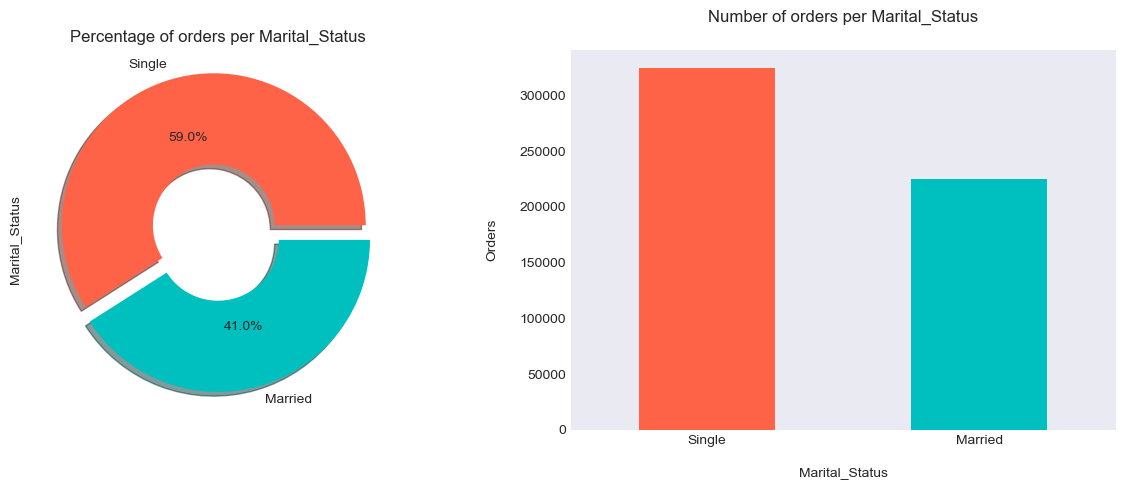

In [76]:
marital_stt_col = df['Marital_Status'].value_counts()

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

marital_stt_col.plot(ax=ax1,
                    kind='pie',
                    labels = marital_stt_col.index,
                    autopct = '%1.1f%%', colors = ['tomato','c'],
                    explode = (0.1, 0), shadow = True,
                    wedgeprops={"width":0.6});

marital_stt_col.plot(ax=ax2,
                    kind='bar',
                    stacked=False, rot=0,
                    color=['tomato','c']);

ax1.set_title('Percentage of orders per Marital_Status');

ax2.set_xlabel('Marital_Status', labelpad=15);
ax2.set_ylabel('Orders', labelpad=15);
ax2.set_title('Number of orders per Marital_Status', pad=20);

plt.tight_layout()

### Column `Product_Category_1/2/3`

In [19]:
product_cat1_type = CategoricalDtype(categories=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], ordered=True)
product_cat1_col = df['Product_Category_1'].astype(product_cat1_type).value_counts(sort=False)

product_cat2_type = CategoricalDtype(categories=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], ordered=True)
product_cat2_col = df['Product_Category_2'].astype(product_cat2_type).value_counts(sort=False)

product_cat3_type = CategoricalDtype(categories=[3,4,5,6,8,9,10,11,12,13,14,15,16,17], ordered=True)
product_cat3_col = df['Product_Category_3'].astype(product_cat3_type).value_counts(sort=False)

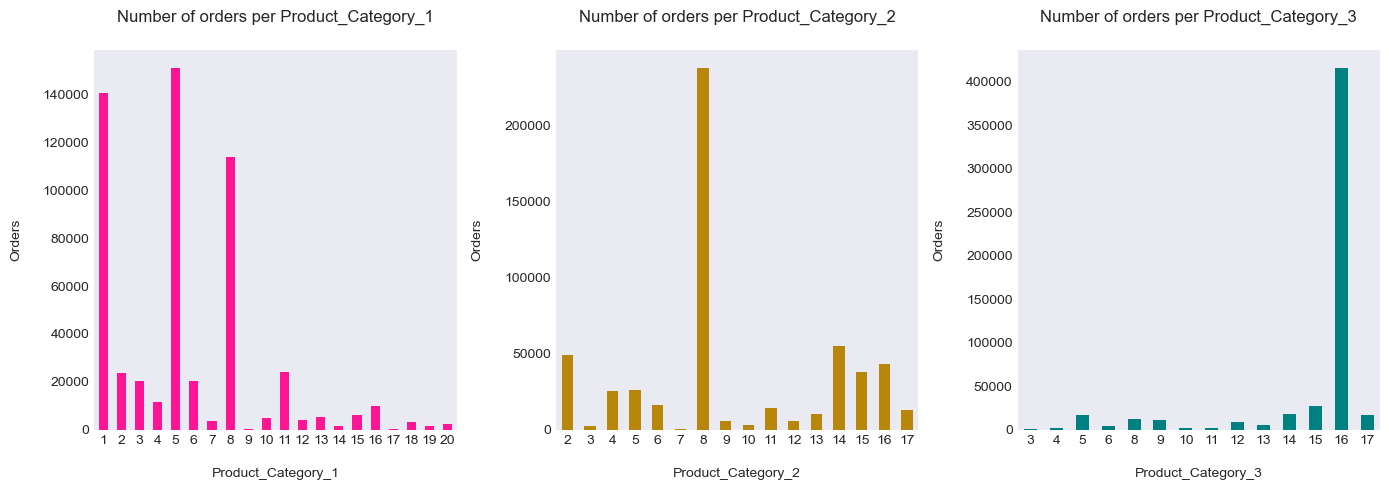

In [20]:
fig, [ax1, ax2, ax3] = plt.subplots(nrows=1, ncols=3, figsize=(14,5))

product_cat1_col.plot(ax=ax1,
                    kind='bar',
                    stacked=False, rot=0,
                    color='deeppink');

product_cat2_col.plot(ax=ax2,
                    kind='bar',
                    stacked=False, rot=0,
                    color='darkgoldenrod');

product_cat3_col.plot(ax=ax3,
                    kind='bar',
                    stacked=False, rot=0,
                    color='teal');

ax1.set_xlabel('Product_Category_1', labelpad=15);
ax1.set_ylabel('Orders', labelpad=15);
ax1.set_title('Number of orders per Product_Category_1', pad=20);

ax2.set_xlabel('Product_Category_2', labelpad=15);
ax2.set_ylabel('Orders', labelpad=15);
ax2.set_title('Number of orders per Product_Category_2', pad=20);

ax3.set_xlabel('Product_Category_3', labelpad=15);
ax3.set_ylabel('Orders', labelpad=15);
ax3.set_title('Number of orders per Product_Category_3', pad=20);

plt.tight_layout()

### Column `Purchase`

<AxesSubplot: title={'center': 'Purchase Distribution'}, ylabel='Density'>

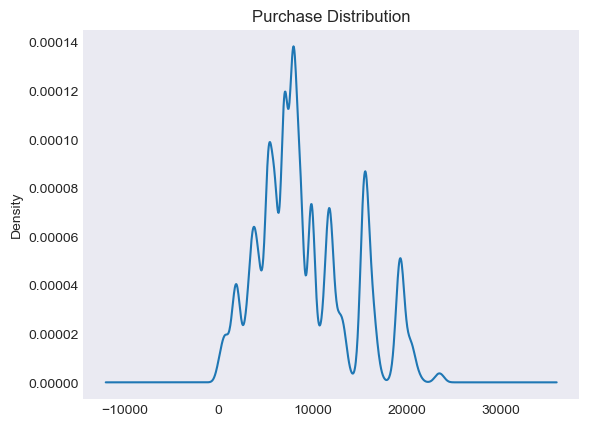

In [85]:
df.Purchase.plot(kind="kde", title = 'Purchase Distribution')

<AxesSubplot: xlabel='Purchase', ylabel='Density'>

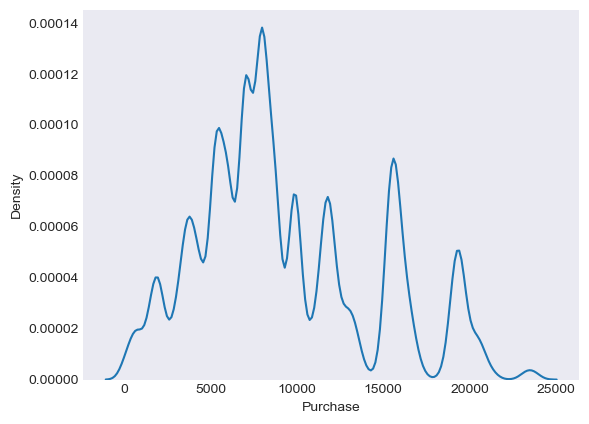

In [83]:
sns.kdeplot(df['Purchase'])

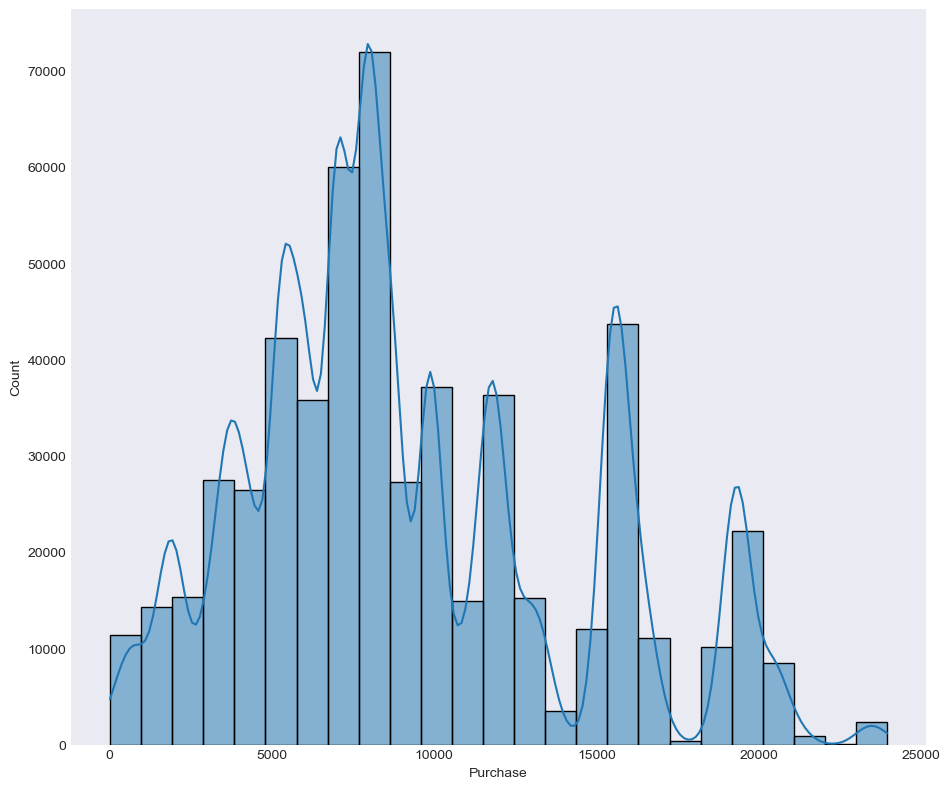

In [82]:
sns.displot(df['Purchase'], bins=25, kde=True, height=8, aspect=1.2)

In [22]:
mean_purchase = df['Purchase'].mean()
median_purchase = df['Purchase'].median()
mode_purchase = df['Purchase'].mode()[0]

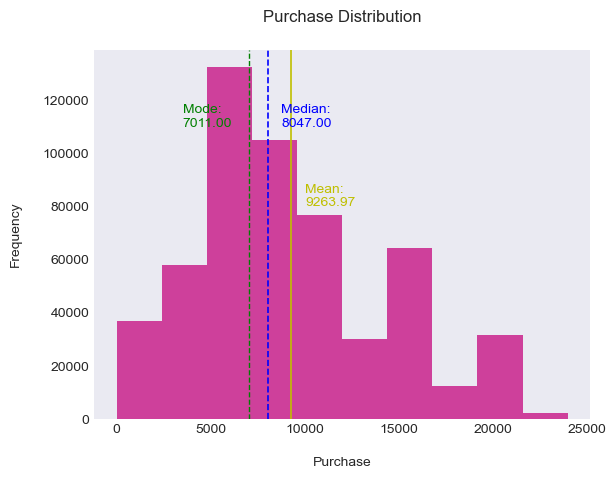

In [23]:
ax = df['Purchase'].plot(kind='hist', 
                        stacked=False, rot=0,
                        color='mediumvioletred',
                        alpha=0.8)

ax.axvline(mean_purchase, color='y', linestyle='-', linewidth=1.2)
ax.text(mean_purchase+750, 80000, f"Mean:\n{mean_purchase:.2f}", color="y")

ax.axvline(median_purchase, color='b', linestyle='dashed', linewidth=1.2)
ax.text(median_purchase+700, 110000, f"Median:\n{median_purchase:.2f}", color="b")

ax.axvline(mode_purchase, color='g', linestyle='--', linewidth=1)
ax.text(mode_purchase-3500, 110000, f"Mode:\n{mode_purchase:.2f}", color="g")

plt.xlabel('Purchase', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title('Purchase Distribution', pad=20)
plt.show;

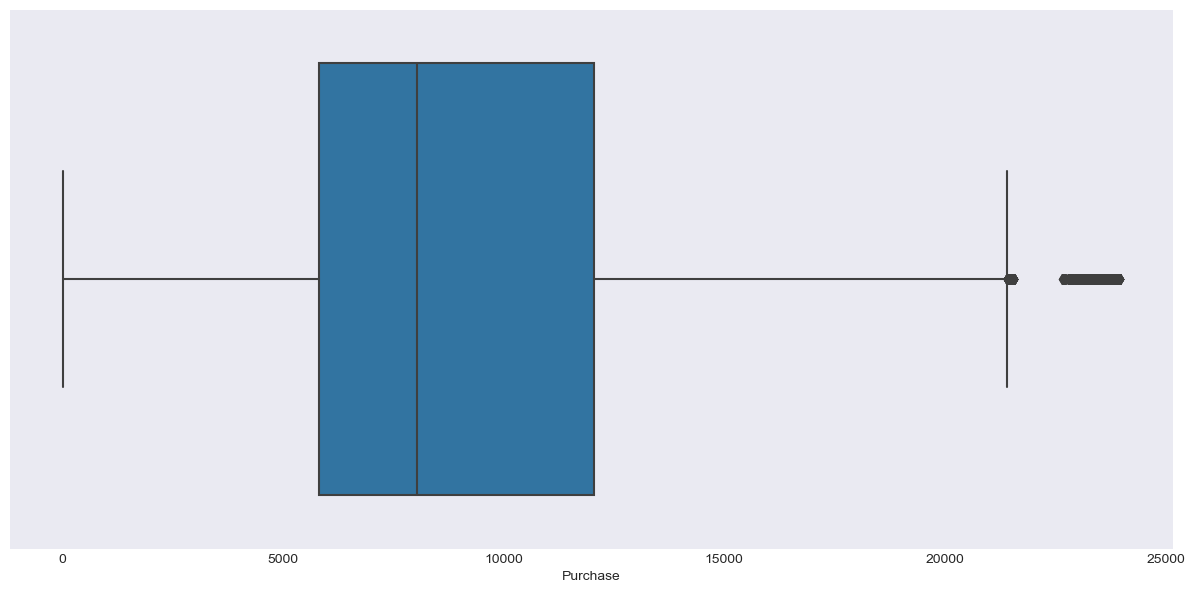

In [92]:
plt.figure(figsize=(15,7));
sns.boxplot(x='Purchase',data=df,orient='h');

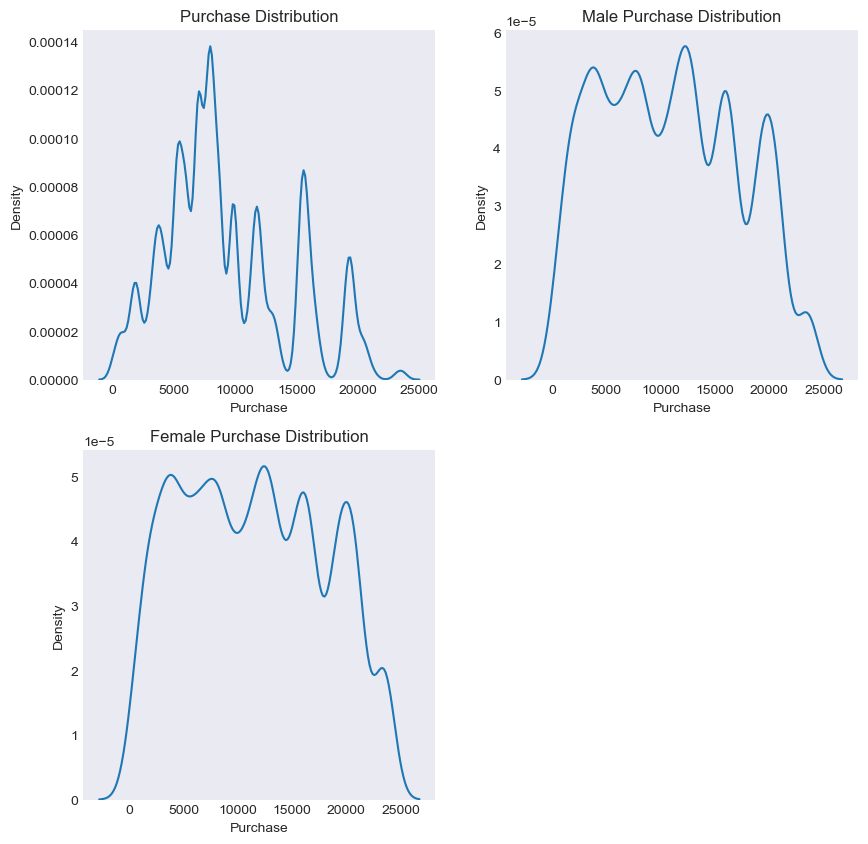

In [94]:
# purchase distribution
male = df[df['Gender'] == 'Female'].value_counts('Purchase')
female = df[df['Gender'] == 'Male'].value_counts('Purchase')

plt.figure(figsize=(10,10),dpi=100);
plt.subplot(2,2,1)
plt.title('Purchase Distribution')
sns.kdeplot(x='Purchase',data=df)

plt.subplot(2,2,2)
plt.title('Male Purchase Distribution')
sns.kdeplot(x='Purchase',data=male)

plt.subplot(2,2,3)
plt.title('Female Purchase Distribution')
sns.kdeplot(x='Purchase',data=female);

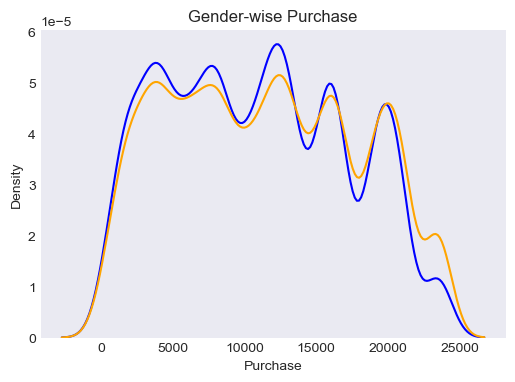

In [108]:
plt.figure(figsize=(6,4))
sns.kdeplot(x='Purchase', data=male, color='blue').set_title('Gender-wise Purchase')
sns.kdeplot(x='Purchase', data=female, color='orange')
plt.show()

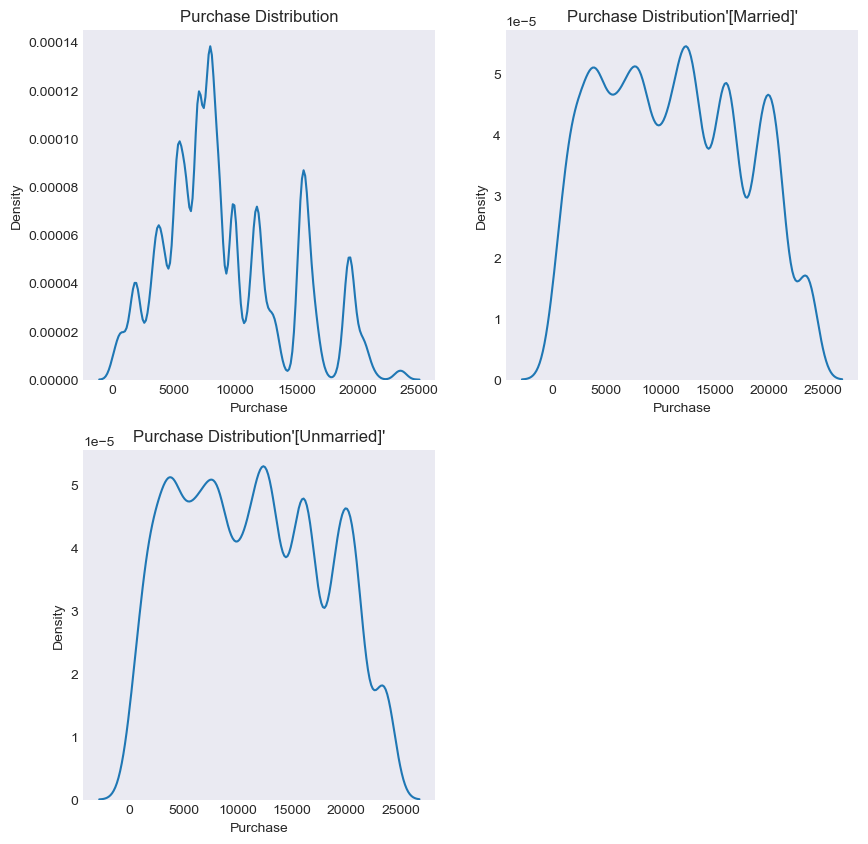

In [96]:
# purchase distribution with respect to Marital Status
married = df[df['Marital_Status'] == 'Married'].value_counts('Purchase')
unmarried = df[df['Marital_Status'] == 'Single'].value_counts('Purchase')
plt.figure(figsize=(10,10),dpi=100);
plt.subplot(2,2,1)
plt.title('Purchase Distribution')
sns.kdeplot(x='Purchase',data=df)

plt.subplot(2,2,2)
plt.title("Purchase Distribution'[Married]'")
sns.kdeplot(x='Purchase',data=married)

plt.subplot(2,2,3)
plt.title("Purchase Distribution'[Unmarried]'")
sns.kdeplot(x='Purchase',data=unmarried);

### Column `G_MS (Gender & Marital Status)`

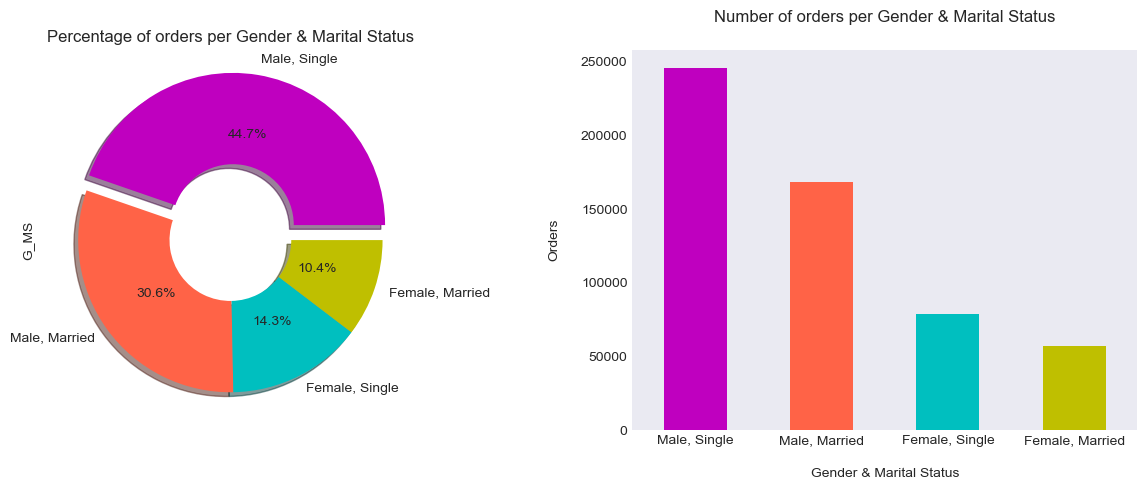

In [77]:
g_ms_col = df['G_MS'].value_counts()

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

g_ms_col.plot(ax=ax1,
              kind='pie', 
              labels = g_ms_col.index,
              autopct = '%1.1f%%',
              colors = ['m','tomato','c','y'],
              explode = (0.1, 0, 0, 0), 
              shadow = True,
              wedgeprops={"width":0.6});

g_ms_col.plot(ax=ax2,
            kind='bar', 
            stacked=False,
            color=['m','tomato','c','y'], rot=0);

ax1.set_title('Percentage of orders per Gender & Marital Status');

ax2.set_xlabel('Gender & Marital Status', labelpad=15);
ax2.set_ylabel('Orders', labelpad=15);
ax2.set_title('Number of orders per Gender & Marital Status', pad=20);

plt.tight_layout()

## <font color='red'>Visualize grouped column</font>
## <font color='red'>By column `'G_MS' (Gender & Marital Stt)`</font>

### Column 'G_MS' (Gender & Marital Stt) vs 'Age'

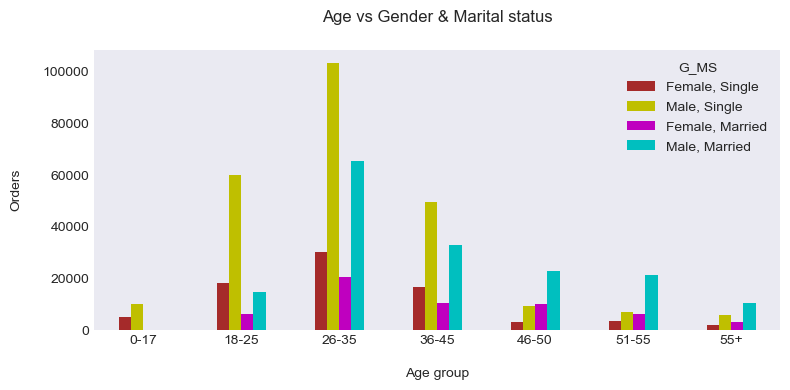

In [25]:
g_ms_type = CategoricalDtype(categories=["Female, Single","Male, Single",
                                         "Female, Married", "Male, Married"], 
                             ordered=True)
df_gms_age = df['G_MS'].astype(g_ms_type).groupby(df['Age']).value_counts(sort=False).unstack()

ax = df_gms_age.plot(kind='bar', 
                    stacked=False,
                    color=['brown', 'y', 'm','c'], rot=0,
                    figsize=(8,4))
plt.xlabel('Age group', labelpad=15)
plt.ylabel('Orders', labelpad=15)
plt.title('Age vs Gender & Marital status', pad=20)
plt.tight_layout()
plt.show;

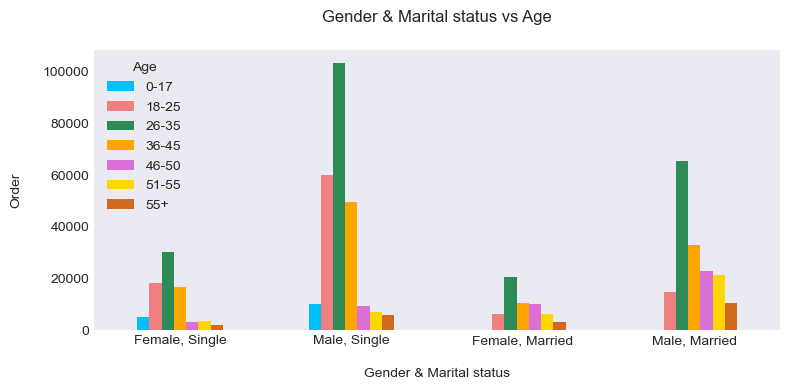

In [26]:
df_age_gms = df['Age'].astype(age_type).groupby(df['G_MS'].astype(g_ms_type)).value_counts(sort=False).unstack()

ax = df_age_gms.plot(kind='bar', 
                    stacked=False,
                    color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                           'orchid','gold','chocolate'], 
                    rot=0,
                    figsize=(8,4))
plt.xlabel('Gender & Marital status', labelpad=15)
plt.ylabel('Order', labelpad=15)
plt.title('Gender & Marital status vs Age', pad=20)
plt.tight_layout()
plt.show;

### Column G_MS vs Occupation

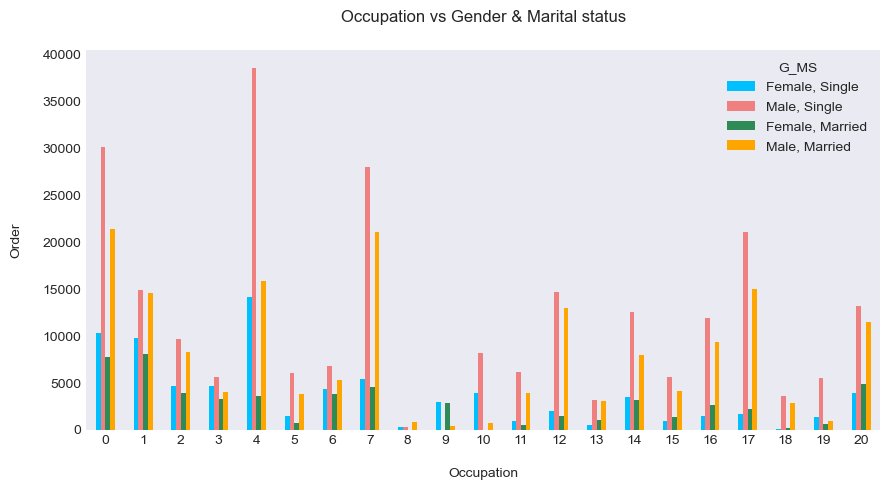

In [27]:
df_occ_gms = df['G_MS'].astype(g_ms_type).groupby(df['Occupation'].astype(occ_type)).value_counts(sort=False).unstack()

ax = df_occ_gms.plot(kind='bar', 
                    stacked=False,
                    color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                           'orchid','gold','chocolate'], 
                    rot=0,
                    figsize=(9,5))
plt.xlabel('Occupation', labelpad=15)
plt.ylabel('Order', labelpad=15)
plt.title('Occupation vs Gender & Marital status', pad=20)
plt.tight_layout()
plt.show;

### Column G_MS vs City_Category

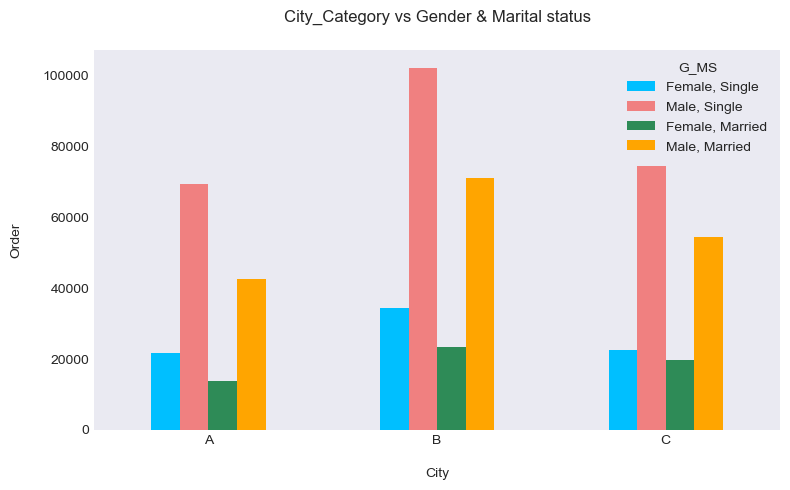

In [28]:
df_citycat_gms = df['G_MS'].astype(g_ms_type).groupby(df['City_Category'].astype(city_type)).value_counts(sort=False).unstack()

ax = df_citycat_gms.plot(kind='bar', 
                        stacked=False,
                        color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                               'orchid','gold','chocolate'], 
                        rot=0,
                        figsize=(8,5))
plt.xlabel('City', labelpad=15)
plt.ylabel('Order', labelpad=15)
plt.title('City_Category vs Gender & Marital status', pad=20)
plt.tight_layout()
plt.show;

### Column Stay_In_Current_City_Years vs G_MS

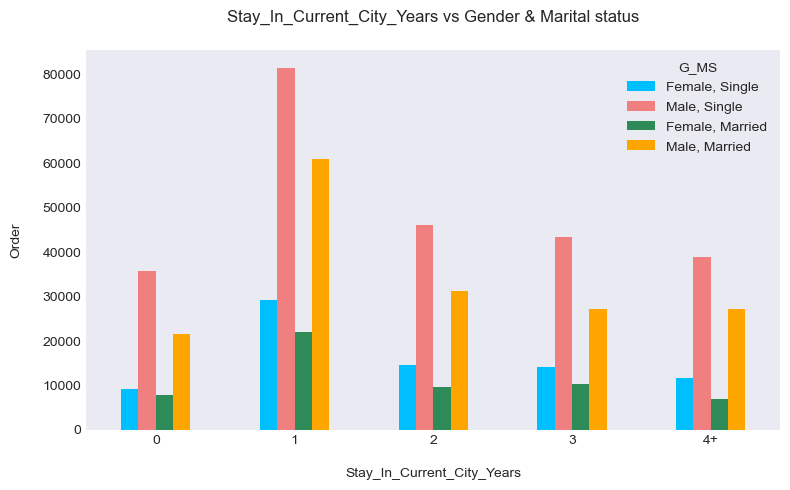

In [29]:
df_city_years_gms = df['G_MS'].astype(g_ms_type).groupby(df['Stay_In_Current_City_Years'].astype(city_years_type)).value_counts(sort=False).unstack()

ax = df_city_years_gms.plot(kind='bar', 
                            stacked=False,
                            color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                                   'orchid','gold','chocolate'], 
                            rot=0,
                            figsize=(8,5))
plt.xlabel('Stay_In_Current_City_Years', labelpad=15)
plt.ylabel('Order', labelpad=15)
plt.title('Stay_In_Current_City_Years vs Gender & Marital status', pad=20)
plt.tight_layout()
plt.show;

### Column Product_Category_1 vs G_MS

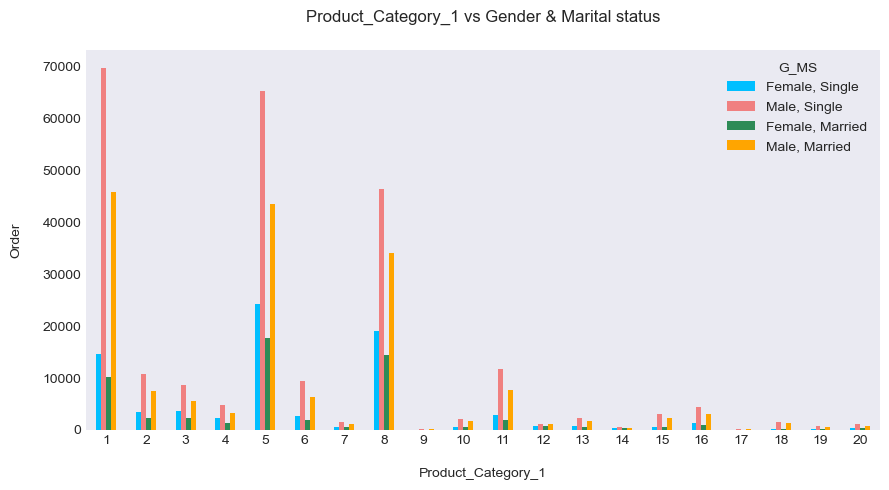

In [30]:
df_product_cat1_gms = df['G_MS'].astype(g_ms_type).groupby(df['Product_Category_1'].astype(product_cat1_type)).value_counts(sort=False).unstack()

ax = df_product_cat1_gms.plot(kind='bar', 
                            stacked=False,
                            color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                                   'orchid','gold','chocolate'], 
                            rot=0,
                            figsize=(9,5))
plt.xlabel('Product_Category_1', labelpad=15)
plt.ylabel('Order', labelpad=15)
plt.title('Product_Category_1 vs Gender & Marital status', pad=20)
plt.tight_layout()
plt.show;

### Column Product_Category_2 vs G_MS

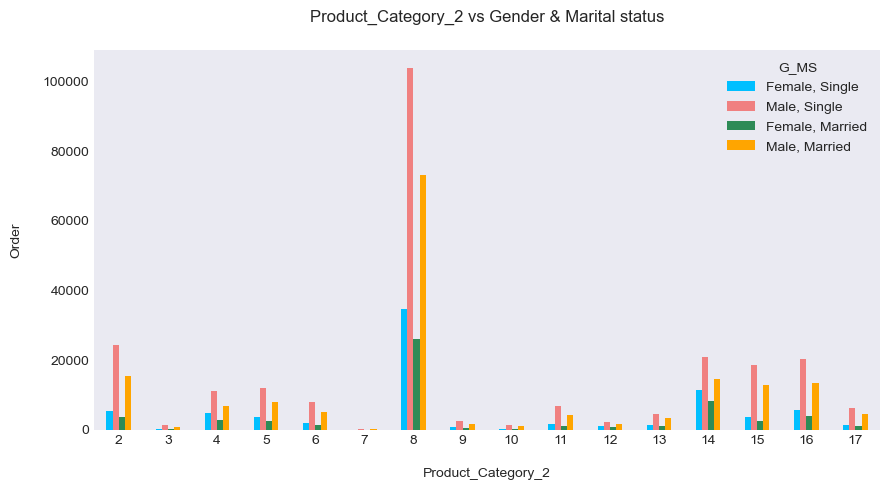

In [31]:
df_product_cat2_gms = df['G_MS'].astype(g_ms_type).groupby(df['Product_Category_2'].astype(product_cat2_type)).value_counts(sort=False).unstack()

ax = df_product_cat2_gms.plot(kind='bar', 
                            stacked=False,
                            color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                                   'orchid','gold','chocolate'], 
                            rot=0,
                            figsize=(9,5))
plt.xlabel('Product_Category_2', labelpad=15)
plt.ylabel('Order', labelpad=15)
plt.title('Product_Category_2 vs Gender & Marital status', pad=20)
plt.tight_layout()
plt.show;

### Column Product_Category_3 vs G_MS

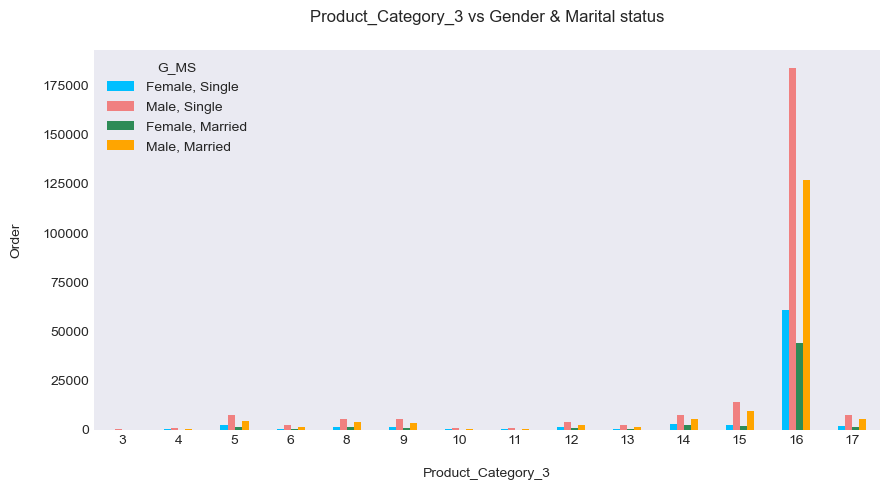

In [32]:
df_product_cat3_gms = df['G_MS'].astype(g_ms_type).groupby(df['Product_Category_3'].astype(product_cat3_type)).value_counts(sort=False).unstack()

ax = df_product_cat3_gms.plot(kind='bar', 
                            stacked=False,
                            color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                                   'orchid','gold','chocolate'], 
                            rot=0,
                            figsize=(9,5))
plt.xlabel('Product_Category_3', labelpad=15)
plt.ylabel('Order', labelpad=15)
plt.title('Product_Category_3 vs Gender & Marital status', pad=20)
plt.tight_layout()
plt.show;

### Combine all grouped plots by `Gender & Marital Status` into subplots

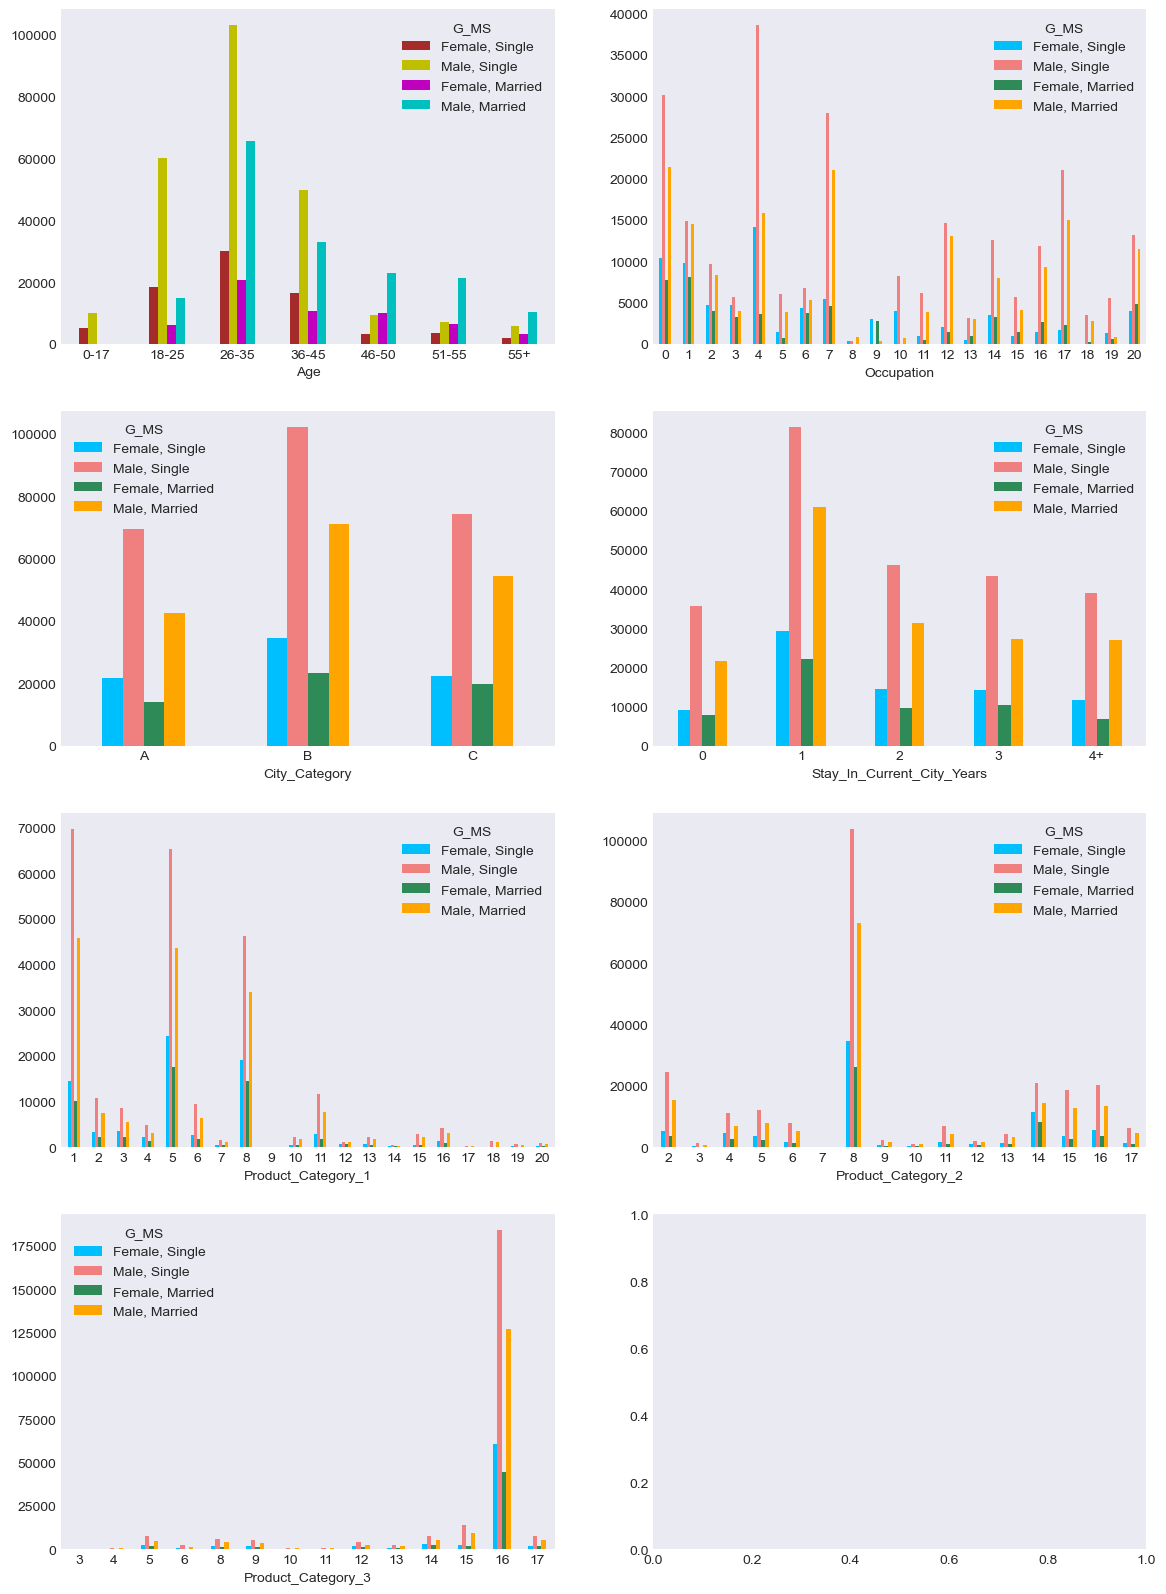

In [33]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14,20))

df_gms_age.plot(ax=axes[0,0],
                kind='bar', 
                stacked=False,
                color=['brown', 'y', 'm','c'], 
                rot=0);

df_occ_gms.plot(ax=axes[0,1],
                kind='bar', 
                stacked=False,
                color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                      'orchid','gold','chocolate'], 
                rot=0);

df_citycat_gms.plot(ax=axes[1,0],
                    kind='bar', 
                    stacked=False,
                    color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                          'orchid','gold','chocolate'], 
                    rot=0);
    
df_city_years_gms.plot(ax=axes[1,1],
                       kind='bar', 
                      stacked=False,
                      color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                            'orchid','gold','chocolate'], 
                      rot=0);

df_product_cat1_gms.plot(ax=axes[2,0],
                        kind='bar', 
                        stacked=False,
                        color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                              'orchid','gold','chocolate'], 
                        rot=0);

df_product_cat2_gms.plot(ax=axes[2,1],
                        kind='bar', 
                        stacked=False,
                        color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                              'orchid','gold','chocolate'], 
                        rot=0);

df_product_cat3_gms.plot(ax=axes[3,0],
                         kind='bar', 
                         stacked=False,
                         color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                               'orchid','gold','chocolate'], 
                          rot=0);

## <font color='red'>By column `Purchase`</font>
* Purchase vs Product ID
* Purchase vs Gender & Marital Status
* Purchase vs Age
* Purchase vs Occupation
* Purchase vs City Category
* Purchase vs Stay_In_Current_City_Years
* Purchase vs Product_Category_1
* Purchase vs Product_Category_2
* Purchase vs Product_Category_3
* Purchase vs Stay_In_Current_City_Years

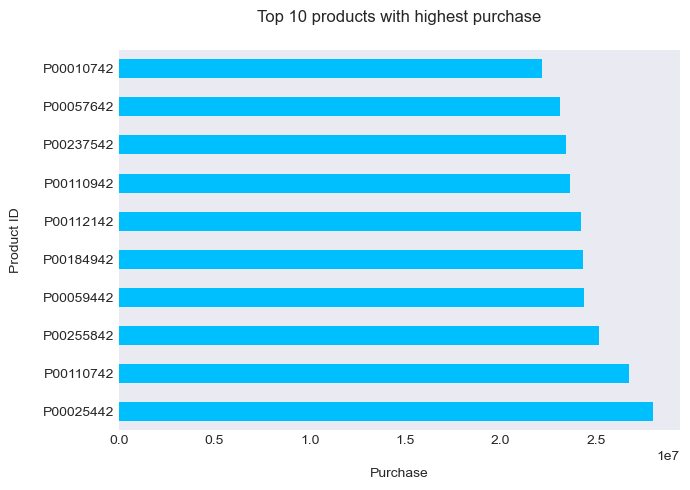

In [60]:
df_product_purchase = df['Purchase'].groupby(df['Product_ID']).sum().nlargest(10)

ax = df_product_purchase.plot(kind='barh', 
                            stacked=False,
                            color=['deepskyblue'], 
                            rot=0,
                            figsize=(7,5))
plt.xlabel('Purchase', labelpad=15)
plt.ylabel('Product ID', labelpad=15)
plt.title('Top 10 products with highest purchase', pad=20)
plt.tight_layout()
plt.show;

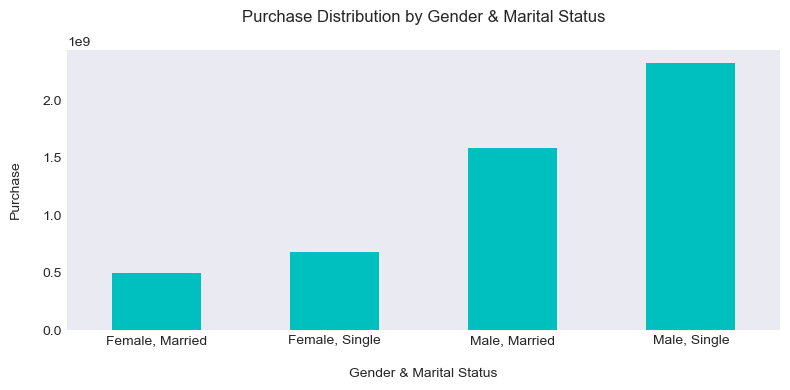

In [61]:
df_gms_purchase = df['Purchase'].groupby(df['G_MS']).sum()

ax = df_gms_purchase.plot(kind='bar', 
                            stacked=False,
                            color=['c'], 
                            rot=0,
                            figsize=(8,4))
plt.xlabel('Gender & Marital Status', labelpad=15)
plt.ylabel('Purchase', labelpad=15)
plt.title('Purchase Distribution by Gender & Marital Status', pad=20)
plt.tight_layout()
plt.show;

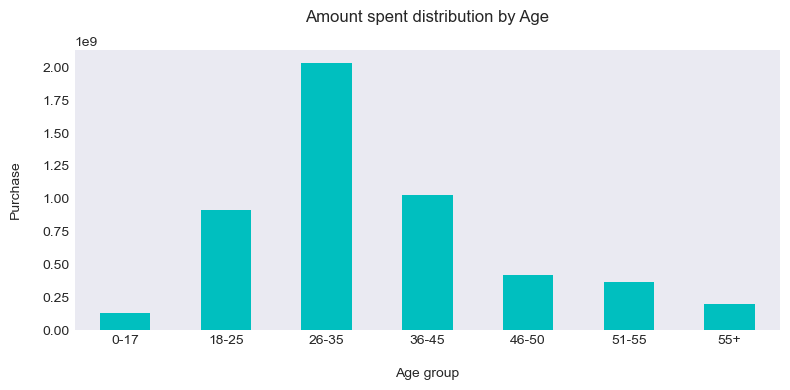

In [55]:
df_age_purchase = df['Purchase'].groupby(df['Age'].astype(age_type)).sum()

ax = df_age_purchase.plot(kind='bar', 
                            stacked=False,
                            color=['c'], 
                            rot=0,
                            figsize=(8,4))
plt.xlabel('Age group', labelpad=15)
plt.ylabel('Purchase', labelpad=15)
plt.title('Amount spent distribution by Age', pad=20)
plt.tight_layout()
plt.show;

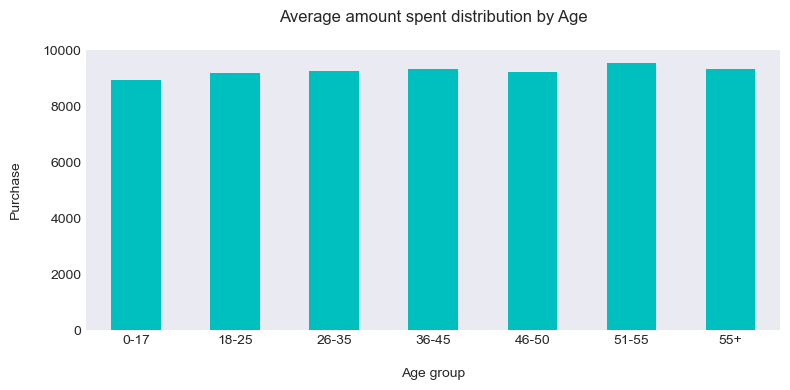

In [69]:
df_age_purchase = df['Purchase'].groupby(df['Age'].astype(age_type)).mean()

ax = df_age_purchase.plot(kind='bar', 
                            stacked=False,
                            color=['c'], 
                            rot=0,
                            figsize=(8,4))
plt.xlabel('Age group', labelpad=15)
plt.ylabel('Purchase', labelpad=15)
plt.title('Average amount spent distribution by Age', pad=20)
plt.tight_layout()
plt.show;

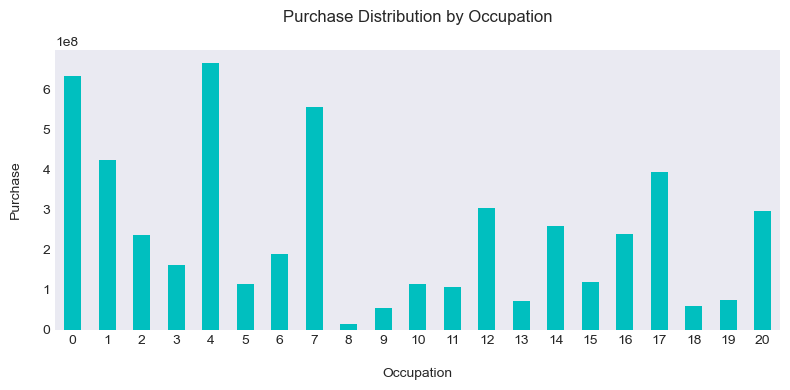

In [56]:
df_occ_purchase = df['Purchase'].groupby(df['Occupation'].astype(occ_type)).sum()

ax = df_occ_purchase.plot(kind='bar', 
                            stacked=False,
                            color=['c'], 
                            rot=0,
                            figsize=(8,4))
plt.xlabel('Occupation', labelpad=15)
plt.ylabel('Purchase', labelpad=15)
plt.title('Purchase Distribution by Occupation', pad=20)
plt.tight_layout()
plt.show;

In [51]:
op=df.groupby('Occupation')['Purchase'].count()

<AxesSubplot: xlabel='Occupation'>

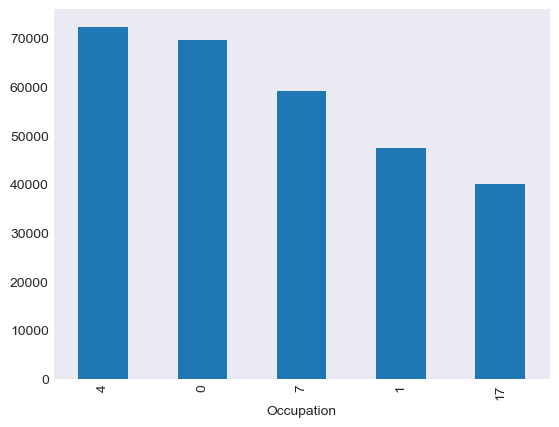

In [39]:
op.nlargest(5).plot(kind='bar')

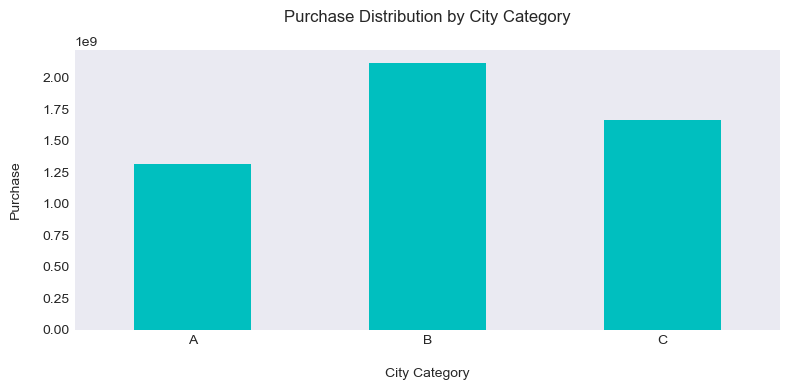

In [62]:
df_city_cat_purchase = df['Purchase'].groupby(df['City_Category'].astype(city_type)).sum()

ax = df_city_cat_purchase.plot(kind='bar', 
                            stacked=False,
                            color=['c'], 
                            rot=0,
                            figsize=(8,4))
plt.xlabel('City Category', labelpad=15)
plt.ylabel('Purchase', labelpad=15)
plt.title('Purchase Distribution by City Category', pad=20)
plt.tight_layout()
plt.show;

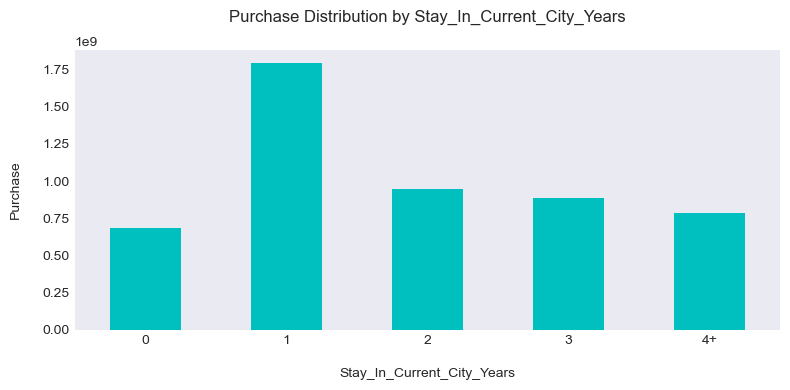

In [63]:
df_city_year_cat_purchase = df['Purchase'].groupby(df['Stay_In_Current_City_Years'].astype(city_years_type)).sum()

ax = df_city_year_cat_purchase.plot(kind='bar', 
                            stacked=False,
                            color=['c'], 
                            rot=0,
                            figsize=(8,4))
plt.xlabel('Stay_In_Current_City_Years', labelpad=15)
plt.ylabel('Purchase', labelpad=15)
plt.title('Purchase Distribution by Stay_In_Current_City_Years', pad=20)
plt.tight_layout()
plt.show;

<AxesSubplot: xlabel='Stay_In_Current_City_Years'>

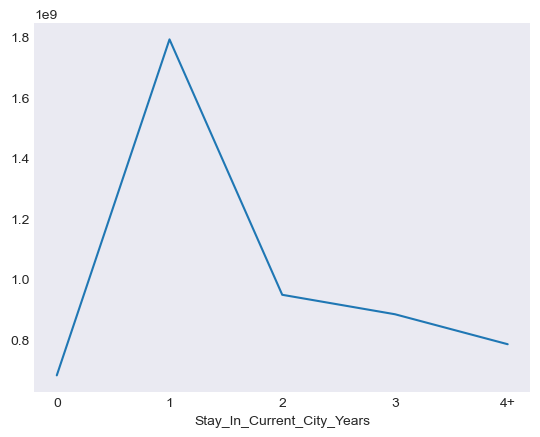

In [64]:
sp=df.groupby('Stay_In_Current_City_Years')['Purchase'].sum()
sp.plot(kind='line')

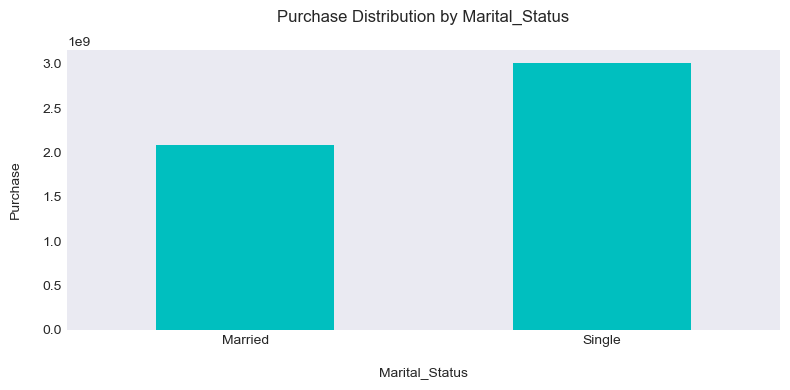

In [65]:
df_city_year_cat_purchase = df['Purchase'].groupby(df['Marital_Status']).sum()

ax = df_city_year_cat_purchase.plot(kind='bar', 
                            stacked=False,
                            color=['c'], 
                            rot=0,
                            figsize=(8,4))
plt.xlabel('Marital_Status', labelpad=15)
plt.ylabel('Purchase', labelpad=15)
plt.title('Marital status distribution', pad=20)
plt.tight_layout()
plt.show;

<AxesSubplot: title={'center': 'Money spent'}, ylabel='Purchase'>

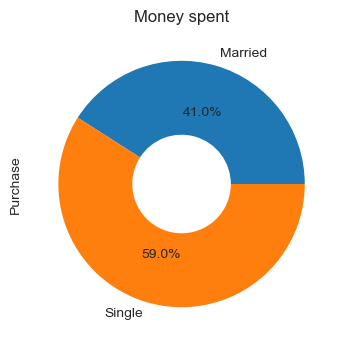

In [78]:
df.groupby('Marital_Status').sum()['Purchase'].plot(kind = 'pie',
                                                   autopct = '%0.1f%%',
                                                   figsize = (4,4),
                                                   title = 'Money spent',
                                                   wedgeprops={"width":0.6})

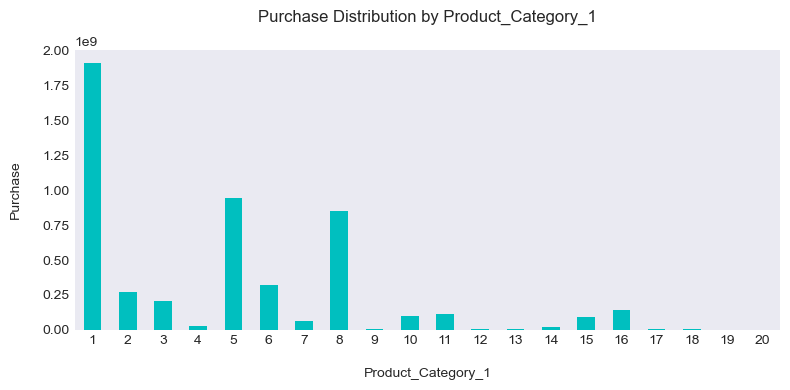

In [66]:
df_product1_cat_purchase = df['Purchase'].groupby(df['Product_Category_1'].astype(product_cat1_type)).sum()

ax = df_product1_cat_purchase.plot(kind='bar', 
                            stacked=False,
                            color=['c'], 
                            rot=0,
                            figsize=(8,4))
plt.xlabel('Product_Category_1', labelpad=15)
plt.ylabel('Purchase', labelpad=15)
plt.title('Purchase Distribution by Product_Category_1', pad=20)
plt.tight_layout()
plt.show;

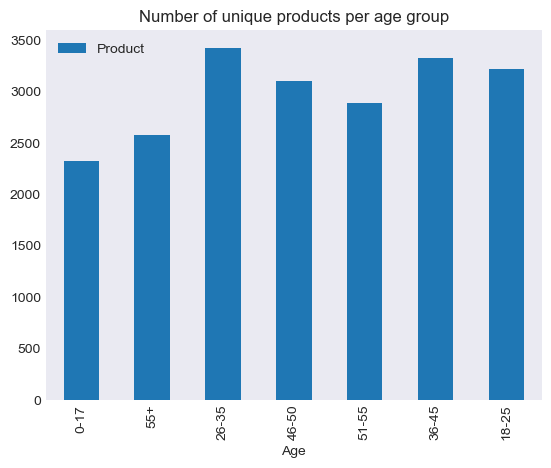

In [54]:
l1 = []
for i in df['Age'].unique():
    l1.append([i,df[df['Age']== i]['Product_ID'].nunique()])
data=pd.DataFrame(l1,columns = ['Age','Product'])
data.plot.bar(x = 'Age',title = 'Number of unique products per age group'); 

<AxesSubplot: xlabel='Product_Category_1'>

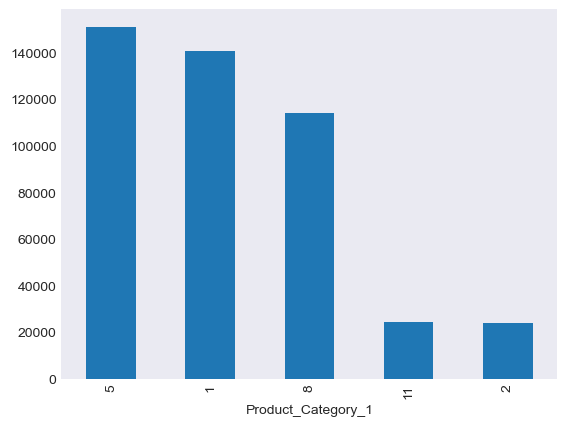

In [45]:
pp1=df.groupby('Product_Category_1')['Purchase'].count()
pp1.nlargest(5).plot(kind='bar')

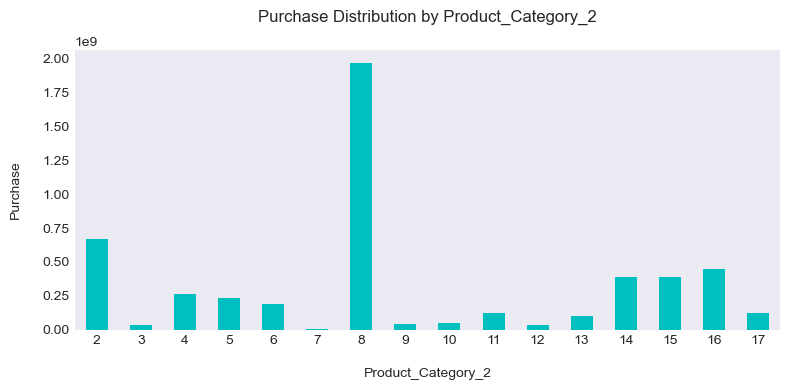

In [67]:
df_product2_cat_purchase = df['Purchase'].groupby(df['Product_Category_2'].astype(product_cat2_type)).sum()

ax = df_product2_cat_purchase.plot(kind='bar', 
                            stacked=False,
                            color=['c'], 
                            rot=0,
                            figsize=(8,4))
plt.xlabel('Product_Category_2', labelpad=15)
plt.ylabel('Purchase', labelpad=15)
plt.title('Purchase Distribution by Product_Category_2', pad=20)
plt.tight_layout()
plt.show;

<AxesSubplot: xlabel='Product_Category_2'>

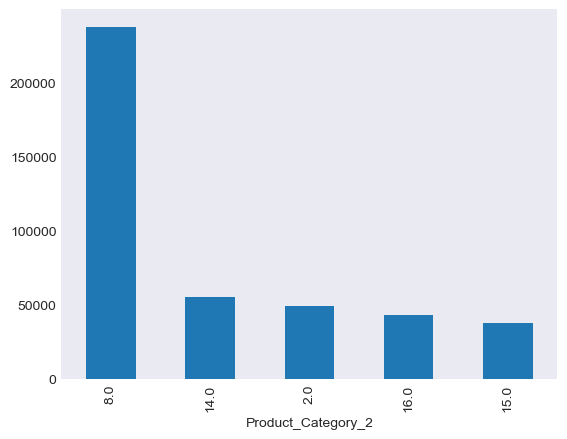

In [47]:
pp2=df.groupby('Product_Category_2')['Purchase'].count()
pp2.nlargest(5).plot(kind='bar')

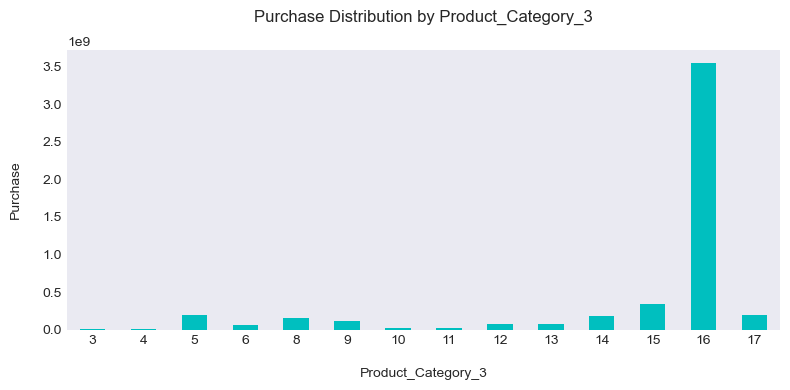

In [68]:
df_product3_cat_purchase = df['Purchase'].groupby(df['Product_Category_3'].astype(product_cat3_type)).sum()

ax = df_product3_cat_purchase.plot(kind='bar', 
                            stacked=False,
                            color=['c'], 
                            rot=0,
                            figsize=(8,4))
plt.xlabel('Product_Category_3', labelpad=15)
plt.ylabel('Purchase', labelpad=15)
plt.title('Purchase Distribution by Product_Category_3', pad=20)
plt.tight_layout()
plt.show;

<AxesSubplot: xlabel='Product_Category_3'>

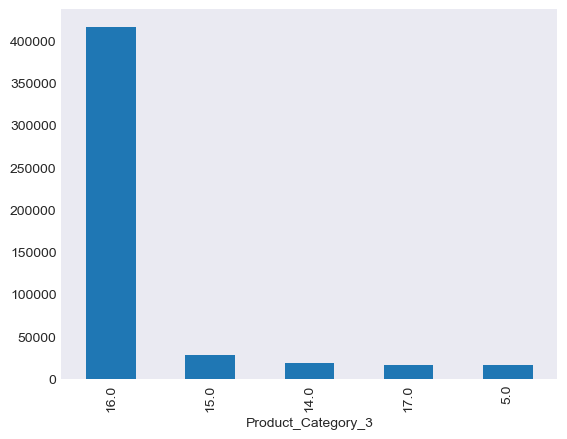

In [49]:
pp3=df.groupby('Product_Category_3')['Purchase'].count()
pp3.nlargest(5).plot(kind='bar')

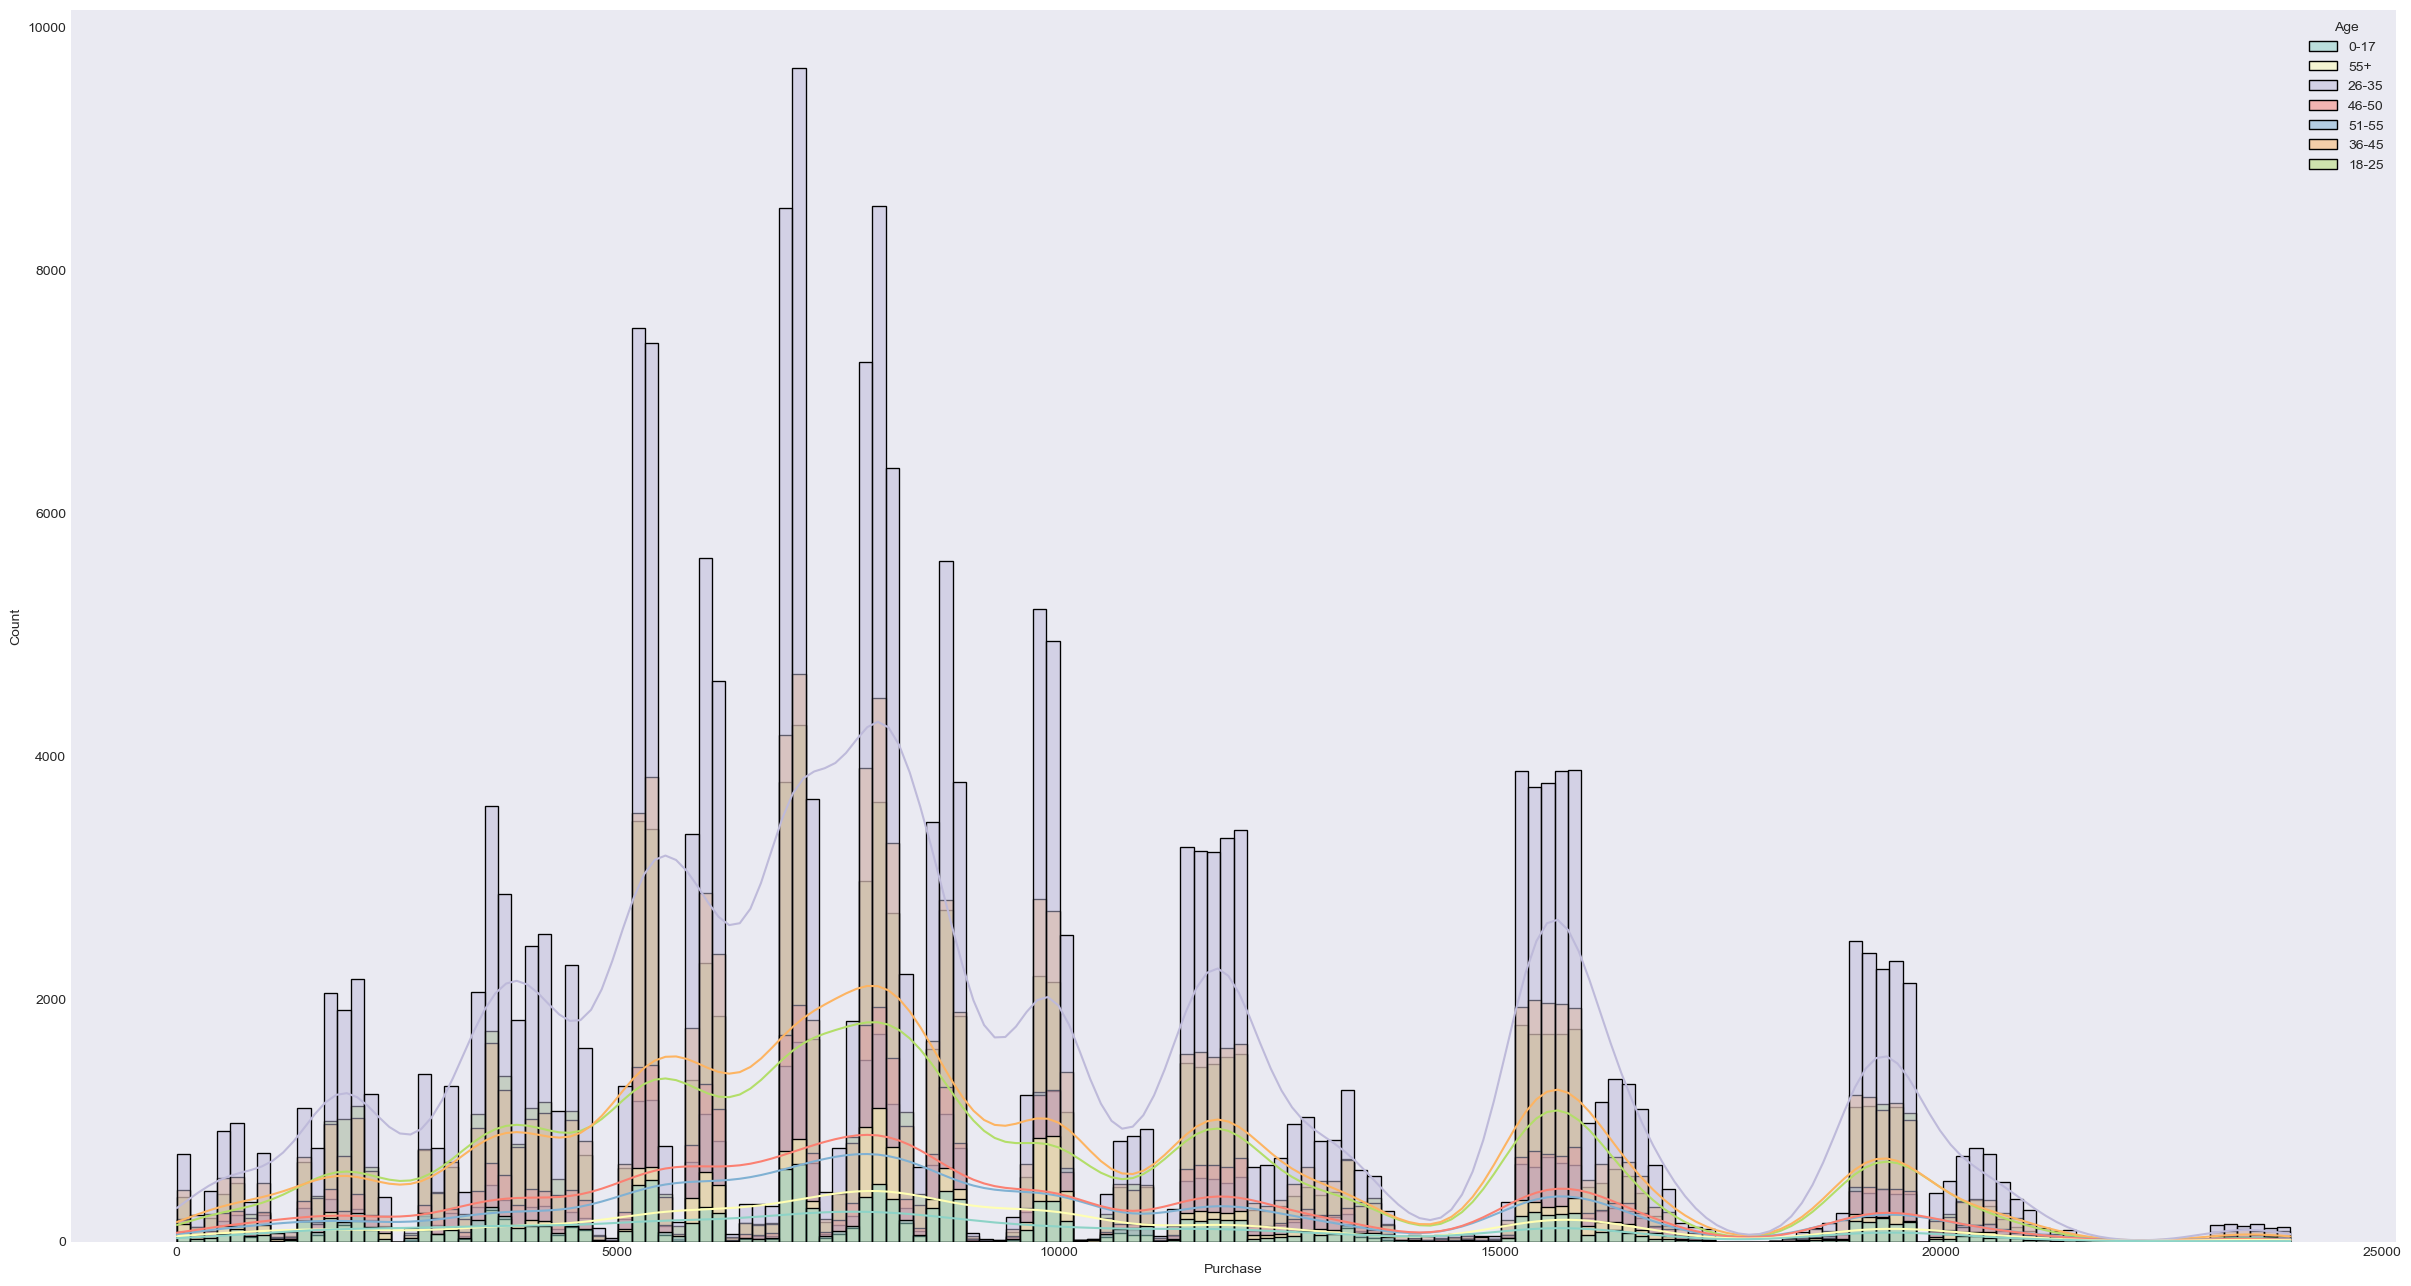

In [98]:
plt.figure(figsize=(30,16));
sns.histplot(x='Purchase',data=df,hue='Age',kde=True,palette='Set3');

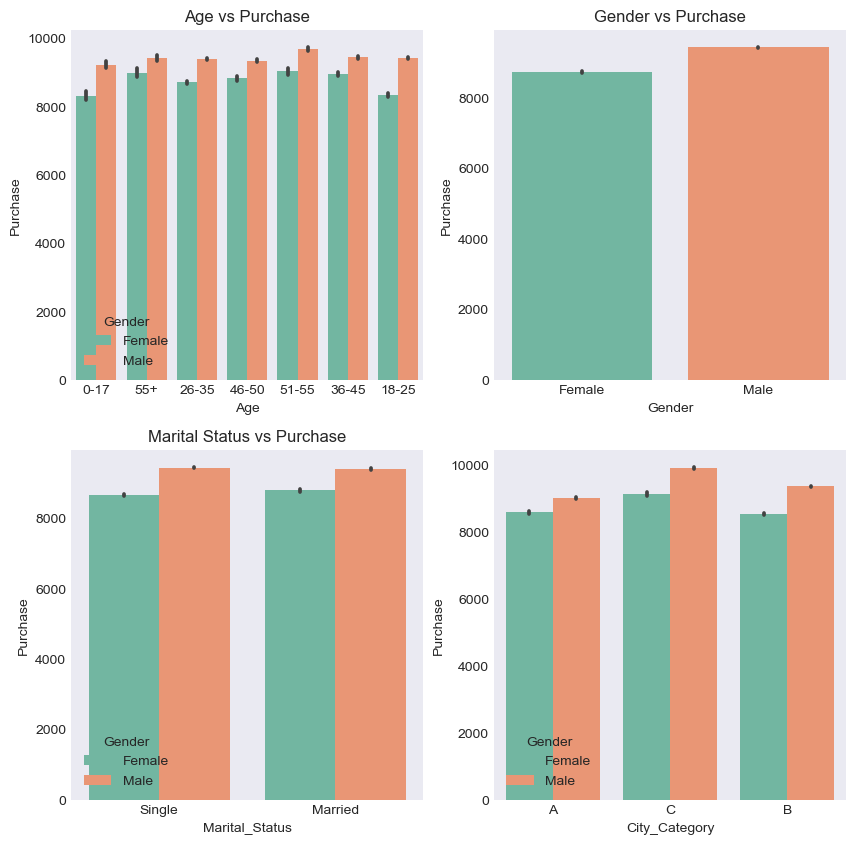

In [97]:
plt.figure(figsize=(10,10),dpi=100)
plt.subplot(2,2,1)
plt.title('Age vs Purchase')
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df,palette='Set2');

plt.subplot(2,2,2)
plt.title('Gender vs Purchase')
sns.barplot(x='Gender',y='Purchase',data=df,palette='Set2');

plt.subplot(2,2,3)
plt.title('Marital Status vs Purchase')
sns.barplot(x='Marital_Status',y='Purchase',hue='Gender',data=df,palette='Set2');

plt.subplot(2,2,4)
plt.title('')
sns.barplot(x='City_Category',y='Purchase',data=df,hue='Gender',palette='Set2');

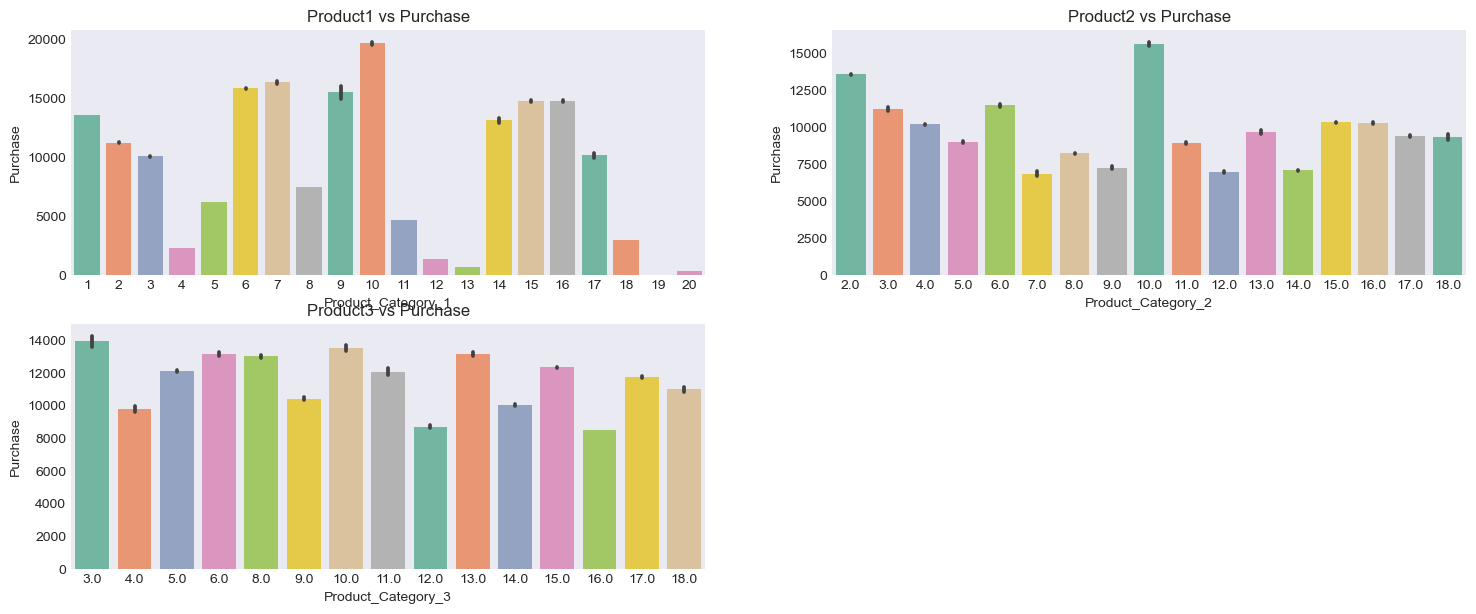

In [100]:
plt.figure(figsize=(18,7),dpi=100)
plt.subplot(2,2,1)
plt.title('Product1 vs Purchase')
sns.barplot(x='Product_Category_1',y='Purchase',data=df,palette='Set2');

plt.subplot(2,2,2)
plt.title('Product2 vs Purchase')
sns.barplot(x='Product_Category_2',y='Purchase',data=df,palette='Set2');

plt.subplot(2,2,3)
plt.title('Product3 vs Purchase')
sns.barplot(x='Product_Category_3',y='Purchase',data=df,palette='Set2');

<AxesSubplot: >

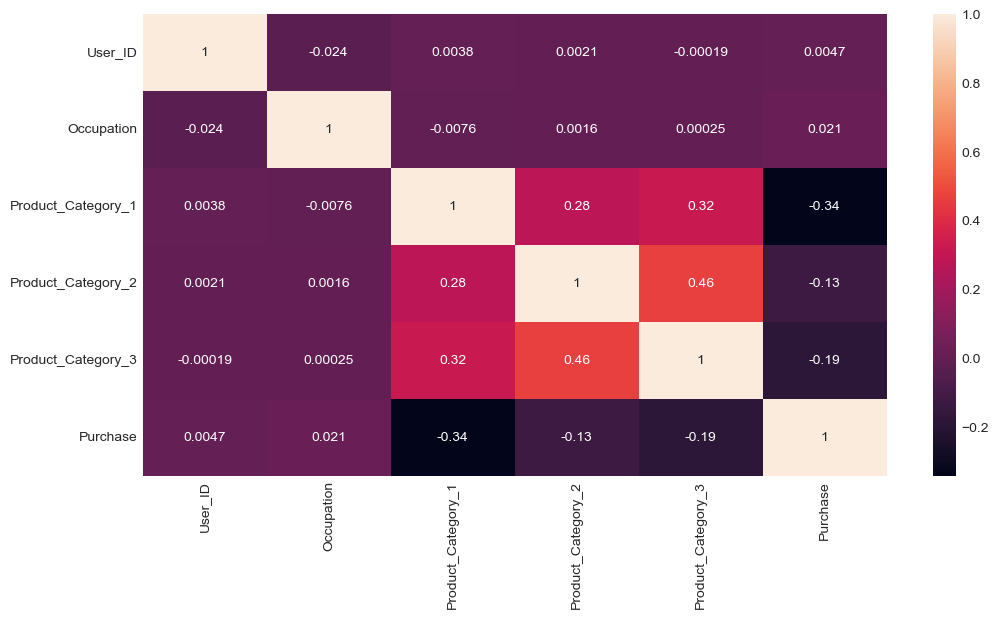

In [102]:
df_corr = df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(df_corr, annot=True)

It can be seen that nothing is highly correlated with the Purchase variable. Although a few conclusions can be drawn:

1.Product_Category_1 has a negative correlation with Purchase.

2.Maritial_Status and Age are strongly correlated. As Expected.

3.Product_Category_3 has a strong correlation with Purchase. Maybe the products in this category were cheap. Let's chrun out some number related to this.